In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_squared_error

In [2]:
sal = pd.read_csv('Salary_Data.csv')

In [3]:
sal.ndim

2

In [4]:
sal.shape

(30, 2)

In [5]:
sal.head

<bound method NDFrame.head of     YearsExperience    Salary
0               1.1   39343.0
1               1.3   46205.0
2               1.5   37731.0
3               2.0   43525.0
4               2.2   39891.0
5               2.9   56642.0
6               3.0   60150.0
7               3.2   54445.0
8               3.2   64445.0
9               3.7   57189.0
10              3.9   63218.0
11              4.0   55794.0
12              4.0   56957.0
13              4.1   57081.0
14              4.5   61111.0
15              4.9   67938.0
16              5.1   66029.0
17              5.3   83088.0
18              5.9   81363.0
19              6.0   93940.0
20              6.8   91738.0
21              7.1   98273.0
22              7.9  101302.0
23              8.2  113812.0
24              8.7  109431.0
25              9.0  105582.0
26              9.5  116969.0
27              9.6  112635.0
28             10.3  122391.0
29             10.5  121872.0>

In [6]:
sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


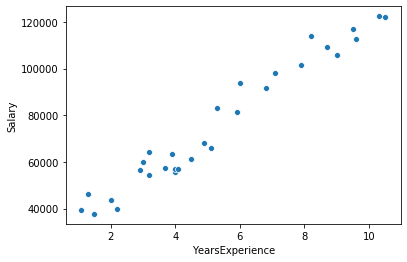

In [7]:
sns.scatterplot(x=sal["YearsExperience"], y=sal["Salary"],data=sal)

In [8]:
corr = sal.corr()

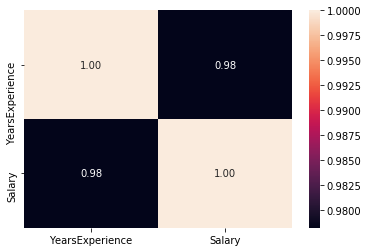

In [9]:
sns.heatmap(corr,annot=True,fmt='.2f', annot_kws={'size':10});

In [10]:
x = sal.drop(['Salary'],axis=1)
y = sal.drop(['YearsExperience'],axis=1)

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=32)

# linear regression

In [12]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred_lr=lr.predict(x_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
print(mse_lr)
print(mse_lr/1e6)

33537436.70708956
33.53743670708956


In [13]:
print('{:0.2f}M'.format(mse_lr/1e6))

33.54M


# desicion tree

In [16]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier(max_depth=100,  random_state=42)
dt_model.fit(x_train,y_train)
y_pred_dt=dt_model.predict(x_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
print('{:0.2f}M'.format(mse_dt/1e6))

46.09M


In [18]:
exp = 4.5
exp = np.reshape(exp,(-1,1))
out = lr.predict(exp)

In [20]:
out.ndim

2

In [21]:
out.item()

68391.69733466278

In [29]:
round(out.item(),2)

68391.7

In [33]:
dt_model.predict(exp)

array([61111.])